In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#dataset
from sklearn.datasets import make_blobs
n_samples = 50
centers = 3
points, klasters = make_blobs(n_samples = n_samples, centers = centers, n_features = 2, random_state = 0, cluster_std = 0.2)

#centroids initilization
def init_centroids1(points, centers):
    centroids = points.copy()
    np.random.shuffle(centroids)
    centroids = centroids[:centers]
    return centroids

def init_centroids2(points, centers):
    centroids = []
    a = np.random.randint(0, centers, 1)
    centroids[0] = points[a[0]]
    for i in range(centers - 1):
        Y = points - centroids[i]
        centroids[i + 1] = np.max(Y, axis = 0)
    return centroids

In [2]:
#kmeans
def move_centroids(points, centroids):
    #centroids that are the most closest to the points:
    closest_centroids = np.argmin((np.sqrt((centroids[:, np.newaxis, :] - points)**2).sum(axis = 2)), axis = 0)
    #broadcasting(np.newaxis), axis=2 bcs 3rd dimention needed
    
    new_centroids = centroids.copy()
    for i in range(centroids.shape[0]):
        new_centroids[i] = points[closest_centroids == i].mean(axis = 0)
        
    return closest_centroids, new_centroids

def kmeans(points, centers):
    centroids = init_centroids1(points, centers)
    while 1:
        closest_centroids, new_centroids = move_centroids(points, centroids)
        if (np.array_equiv(centroids, new_centroids)):
            break
        centroids = new_centroids
    return closest_centroids, centroids
    

[1 2 1 1 0 1 0 0 2 0 0 2 1 2 2 1 1 0 0 1 2 2 2 1 0 0 0 2 0 1 2 1 0 2 2 1 2
 0 1 0 2 1 0 2 2 1 2 0 1 1]


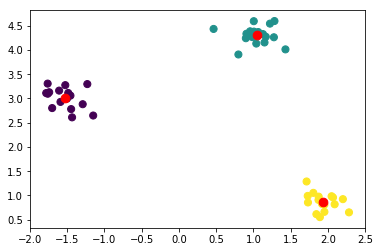

In [3]:
#drawing
import matplotlib.pyplot as plt

closest_centroids, centroids = kmeans(points, centers)
print(closest_centroids)
plt.scatter(points[:, 0], points[:, 1], s = 50, c = closest_centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s = 75)

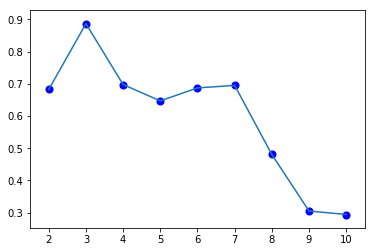

In [5]:
from sklearn import metrics

x = []
y = []
max_klasters = 10
for i in range(2, max_klasters + 1):
    closest_centroids, centroids = kmeans(points, i)
    x.append(i)
    y.append(metrics.silhouette_score(points, closest_centroids))
plt.xticks(np.arange(0, max_klasters + 1, 1.0))
plt.plot(x, y)
plt.scatter(x, y, s = 50, c = 'b')
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


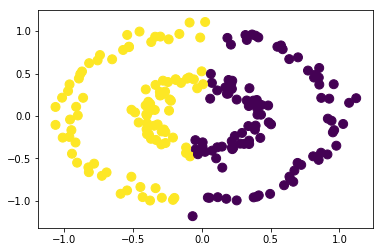

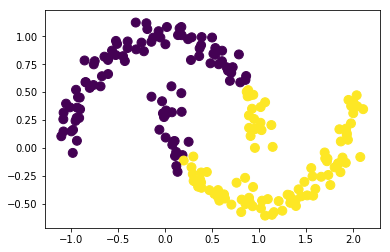

In [15]:
from sklearn import datasets
X1, y1 = datasets.make_circles(n_samples = 200, noise = 0.07, factor = 0.4)
X2, y2 = datasets.make_moons(n_samples = 200, noise = 0.07)

closest_centroids, centroids = kmeans(X1, centers = 2)
plt.figure(figsize=(6, 4))
plt.scatter(X1[:, 0], X1[:, 1], s = 80, c = closest_centroids, cmap="viridis")

closest_centroids2, centroids2 = kmeans(X2, centers = 2)
plt.subplot()
plt.figure(figsize=(6, 4))
plt.scatter(X2[:, 0], X2[:, 1], s = 80, c = closest_centroids2, cmap="viridis")
plt.plot()
plt.show()